In [1]:
# Basic Libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
breastcancer = pd.read_csv('breast-cancer-wisconsin.data')

In [3]:
breastcancer.columns = [
    "Sample code number",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]

In [4]:
breastcancer = breastcancer.replace('?', np.nan)

In [5]:
# Remove missing data
breastcancer.dropna(axis='index', inplace = True)

In [6]:
breastcancer.drop("Sample code number", axis=1, inplace=True)
breastcancer.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [7]:
breastcancer = breastcancer.astype({"Bare Nuclei":'int64'})

In [8]:
clump = pd.DataFrame(breastcancer['Clump Thickness'])
cell_size = pd.DataFrame(breastcancer['Uniformity of Cell Size'])
cell_shape = pd.DataFrame(breastcancer['Uniformity of Cell Shape'])
marginal_adhesion = pd.DataFrame(breastcancer['Marginal Adhesion'])
epithelial = pd.DataFrame(breastcancer['Single Epithelial Cell Size'])
nuclei = pd.DataFrame(breastcancer['Bare Nuclei'])
chromatin = pd.DataFrame(breastcancer['Bland Chromatin'])
nucleoli = pd.DataFrame(breastcancer['Normal Nucleoli'])
mitoses = pd.DataFrame(breastcancer['Mitoses'])
class_ = pd.DataFrame(breastcancer['Class'])

In [9]:
#breastcancer.to_csv('DAM_BreastCancer.csv', index=False)

In [13]:
nuclei.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 1 columns):
Bare Nuclei    682 non-null int64
dtypes: int64(1)
memory usage: 10.7 KB


In [14]:
breastcancer = breastcancer.astype({"Clump Thickness":'category', "Uniformity of Cell Size": 'category', "Uniformity of Cell Shape": 'category', "Marginal Adhesion": 'category', "Single Epithelial Cell Size": 'category', "Bare Nuclei": 'category', "Bland Chromatin": 'category', "Normal Nucleoli": 'category', "Mitoses": 'category', "Class": 'category'})

In [15]:
breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 10 columns):
Clump Thickness                682 non-null category
Uniformity of Cell Size        682 non-null category
Uniformity of Cell Shape       682 non-null category
Marginal Adhesion              682 non-null category
Single Epithelial Cell Size    682 non-null category
Bare Nuclei                    682 non-null category
Bland Chromatin                682 non-null category
Normal Nucleoli                682 non-null category
Mitoses                        682 non-null category
Class                          682 non-null category
dtypes: category(10)
memory usage: 15.6 KB


# Uni Variate Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Function to calculate decision tree accuracies for individual factors
def acc_score (X):
    # Split the Dataset into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(X, class_, test_size = 0.25)
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = None)  # Create the decision tree object
    dectree.fit(x_train, y_train)  
    return dectree.score(x_test, y_test)

In [13]:
score = [acc_score(clump), acc_score(cell_size), acc_score(cell_shape), acc_score(marginal_adhesion),
         acc_score(epithelial), acc_score(nuclei), acc_score(chromatin), acc_score(nucleoli), acc_score(mitoses)]        
score_factors = pd.DataFrame(score, columns = ['Accuracy Score'], 
                      index = ['clump', 'cell_size', 'cell_shape', 'marginal_adhesion','epithelial',
                               'nuclei', 'chromatin', 'nucleoli', 'mitoses'])
score_factors.sort_values(by = 'Accuracy Score')

,Accuracy Score
mitoses,0.748538
marginal_adhesion,0.847953
clump,0.859649
nucleoli,0.894737
epithelial,0.900585
chromatin,0.900585
nuclei,0.906433
cell_size,0.918129
cell_shape,0.947368


# Multivariate Decision Tree

In [14]:
# Concat all the individual factors
factors2 = pd.concat([clump, cell_size, cell_shape, marginal_adhesion,epithelial,
                    nuclei, chromatin, nucleoli, mitoses], sort = False, axis = 1)
factors2.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1


In [15]:
y = class_
X = pd.DataFrame(factors2)

In [16]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (511, 1) (511, 9)
Test Set  : (171, 1) (171, 9)


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # Create the decision tree object
# Fit Decision Tree on Train Data 
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.9955423476968797

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.948356807511737



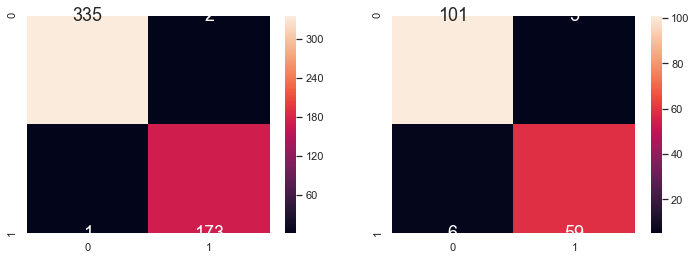

In [18]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, pos_label = 2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, pos_label = 2))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Random Forest

In [19]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 bootstrap = True,
                                max_features = 'sqrt') 

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.9714285714285713



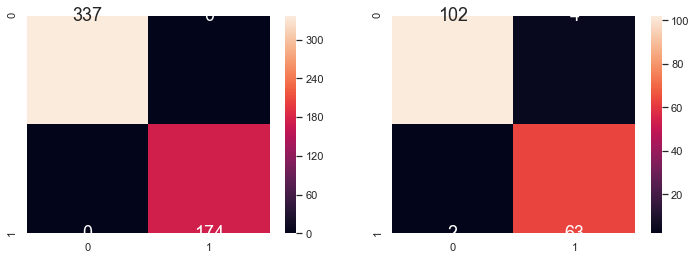

In [20]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, pos_label = 2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, pos_label = 2))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Logistic Regression

In [21]:
# Import Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
LR = LogisticRegression()
# Fit Logistic Regression on Train Data 
LR.fit(X_train,y_train.values.ravel())

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9778434268833087

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9671361502347416



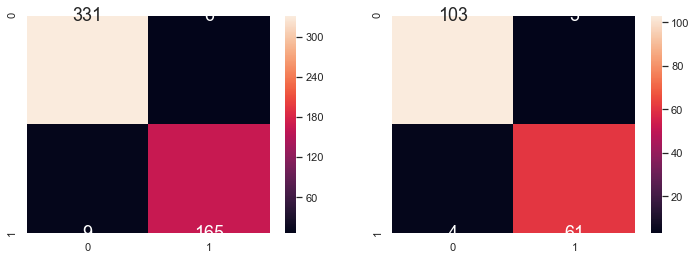

In [22]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred, pos_label = 2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred, pos_label = 2))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# K-Nearest Neighbours

In [23]:
# Import KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
KNN = KNeighborsClassifier(n_neighbors=22) # k = squareroot N, where N is the number of training data (sqrt(0.75x682))
KNN.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9764011799410031

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9765258215962441



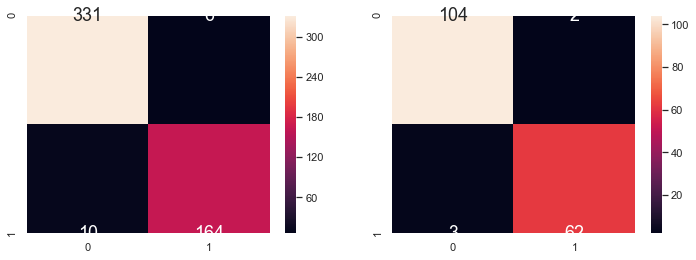

In [24]:
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred, pos_label = 2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred, pos_label = 2))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Gradient Boosting 

In [25]:
# Import GradientBoostingClassifier model from Scikit-Learn
from sklearn.ensemble import GradientBoostingClassifier

gradboost = GradientBoostingClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                      max_depth = 2,        # Set the maximum depth of each tree
                                      learning_rate = 0.1)  # Learning_rate shrinks the contribution of each tree   

# Fit Gradient Boosting model on Train Data
gradboost.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.9970326409495549

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.957345971563981



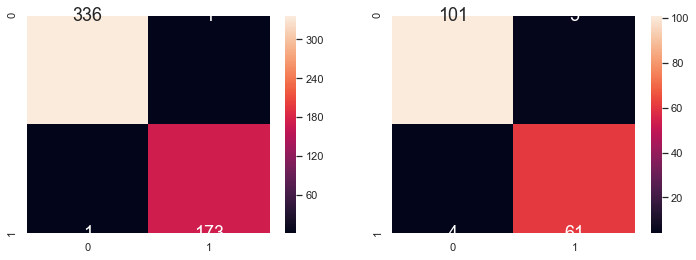

In [26]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = gradboost.predict(X_train)
y_test_pred = gradboost.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, pos_label = 2))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, pos_label = 2))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# XG Boost

In [27]:
# Import XGBClassifier model from Scikit-Learn
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100,     # n_estimators denote number of trees
                    max_depth = 2,          # Set the maximum depth of each tree
                    gamma=0,                # Regularization parameter: min loss reduction required to make a further partition on a leaf node of the tree
                    learning_rate = 0.1,  # Learning_rate shrinks the contribution of each tree   
                    colsample_bytree = 0.3) # Subsample ratio by number of columns when constructing each tree

# Fit XGBoost on Train Data 
xgb.fit(X_train, y_train.values.ravel())

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, Mitoses